In [4]:
from random import choice, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import queue
import statistics as stat
rnd.seed(30)
plt.style.use('seaborn-whitegrid')
plt.rc('figure',figsize=(15,6))

In [104]:
n = 1000
observed = []

for i in range(n):
    outcome = choice(['Head', 'Tail'])
    if outcome == 'Head':
        observed.append(1)
    else:
        observed.append(0)

print("Prob = ", round(np.mean(observed), 2))

Prob =  0.52


In [105]:
cum_observed = np.cumsum(observed)

In [106]:
moving_avg = []

In [107]:
for i in range(n):
    moving_avg.append(cum_observed[i] / (i+1))

In [108]:
x = np.arange(0, len(moving_avg), 1)

In [109]:
p = [0.5 for i in range(len(moving_avg))]

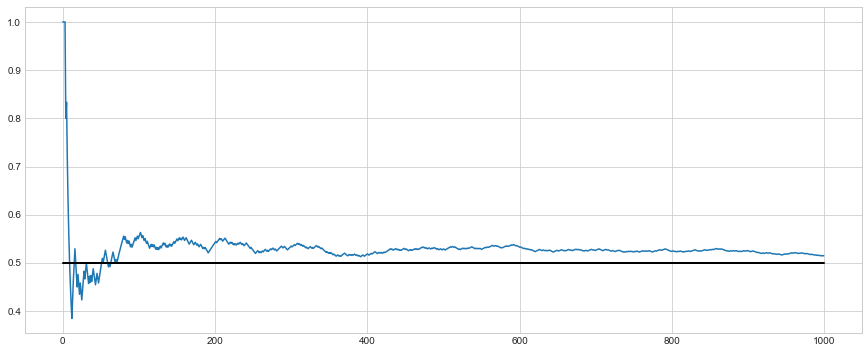

In [110]:

plt.plot(x, moving_avg)
plt.plot(x, p, linewidth=2, color='black')

## Continous Time Markov Chains

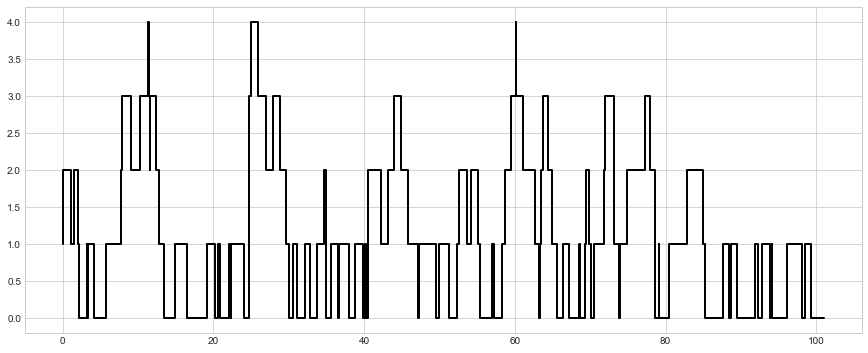

In [111]:
from random import expovariate

Avg_IAT = 2.0
Avg_ST = 1.0
Sim_Time = 100
N = 0
clock = 0

X = [] # Times of Events
Y = [] # Values of N

while clock <= Sim_Time:
    IAT = expovariate( 1 / Avg_IAT)
    ST = expovariate( 1 / Avg_ST)
    
    if IAT <= ST:
        N += 1
        clock = clock + IAT
        X.append(clock)
        Y.append(N)
    elif IAT > ST:
        if N > 0:
            N = N - 1
            clock = clock + ST
            X.append(clock)
            Y.append(N)

plt.step(X,Y, linewidth=2, color='black')


## Single Server Queuing

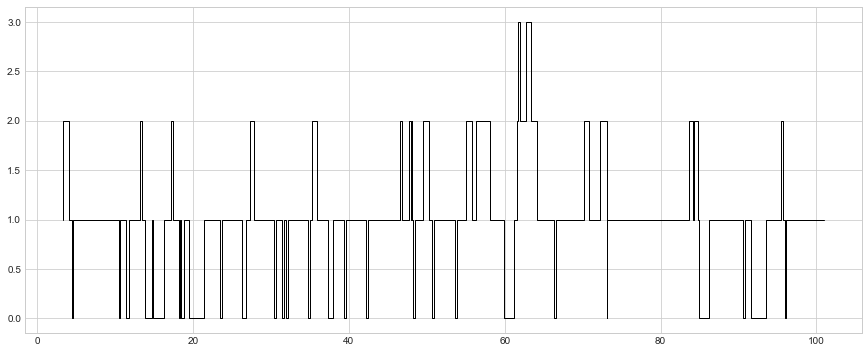

In [112]:
from math import inf

AVG_IAT = 2.0
AVG_ST = 1.0
TOT_SIM_TIME = 100.0
clock = 0
N = 0 

X = [] # Times of Events
Y = [] # Values of N


ARR_TIME = expovariate(1/AVG_IAT)
DEP_TIME = inf

while clock <= TOT_SIM_TIME:
    if ARR_TIME < DEP_TIME:
        clock = ARR_TIME
        N = N + 1
        ARR_TIME = clock + expovariate(1/AVG_IAT)
        if N == 1:
            DEP_TIME = clock + expovariate (1/AVG_ST)
    else:
        clock = DEP_TIME
        N = N - 1
        if N > 0:
            DEP_TIME = clock + expovariate(1/AVG_ST)
        else:
            DEP_TIME = inf
    X.append(clock)
    Y.append(N)
plt.step(X,Y, linewidth=1, color='black')

In [113]:
lamda = 1.3 # Arrival Rate
mu = 2.0 #Departure/Service Rate
NUM_PKTS = 100000 # Number of Packets
count = 0 # Count
clock = 0 # Clock
N = 0 

ARR_TIME = expovariate(lamda)
DEP_TIME = inf

ARR_TIME_DATA = []
DEP_TIME_DATA = []
DELAY_DATA = []

while count < NUM_PKTS:
    if ARR_TIME < DEP_TIME:
        clock = ARR_TIME
        ARR_TIME_DATA.append(clock)
        N = N + 1
        ARR_TIME = clock + expovariate(lamda)
        if N == 1:
            DEP_TIME = clock + expovariate(mu)
    else:
        clock = DEP_TIME
        DEP_TIME_DATA.append(clock)
        N = N - 1
        count = count + 1
        if N > 0 :
            DEP_TIME = clock + expovariate(mu)
        else:
            DEP_TIME = inf

for i in range(NUM_PKTS):
    d = DEP_TIME_DATA[i] - ARR_TIME_DATA[i]
    DELAY_DATA.append(d)

print("Avg Delay: ", round(np.mean(DELAY_DATA), 4))


Avg Delay:  1.4095


In [114]:
lamda = 1.3 # Arrival Rate
mu = 2.0 #Departure/Service Rate
NUM_PKTS = 100000 # Number of Packets
count = 0 # Count
clock = 0 # Clock
N = 0 

ARR_TIME = expovariate(lamda)
DEP_TIME = inf
DATA = {}
PREV_EVENT_TIME = 0.0
AREA = []

while count < NUM_PKTS:
    if ARR_TIME < DEP_TIME:
        clock = ARR_TIME
        delta = clock - PREV_EVENT_TIME
        if N in DATA:
            DATA[N] += delta
        else:
            DATA[N] = delta
            
        AREA.append((clock - PREV_EVENT_TIME) * N)
        PREV_EVENT_TIME = clock
        N = N + 1
        ARR_TIME = clock + expovariate(lamda)
        if N == 1:
            DEP_TIME = clock + expovariate(mu)
    else:
        clock = DEP_TIME
        delta = clock - PREV_EVENT_TIME
        if N in DATA:
            DATA[N] += delta
        else:
            DATA[N] = delta
            
        AREA.append((clock - PREV_EVENT_TIME) * N)
        PREV_EVENT_TIME = clock
        N = N - 1
        count = count + 1
        if N > 0 :
            DEP_TIME = clock + expovariate(mu)
        else:
            DEP_TIME = inf

print("E[N(t)] = ", round(sum(AREA)/clock, 4))

for (k, v) in DATA.items():
    DATA[k] = v/clock
print("Sum of Probs: ", sum(DATA.values()))
mean = 0.0
for (k,v) in DATA.items():
    mean = mean + k * v

print("E[N] = ", mean)

E[N(t)] =  1.8449
Sum of Probs:  1.0000000000000002
E[N] =  1.8448629434529131


In [115]:
# A user-defined simulation library

from random import expovariate
from statistics import mean
from math import inf as Infinity


# Simulation of mm1 queueing system
# This function returns the average delay
def mm1(lamda, mu, Num_Pkts):
    count = 0  # Count number of simulated packets
    clock = 0
    N = 0  # State Variable; number of packets in system

    Arr_Time = expovariate(lamda)
    Dep_Time = Infinity

    # Output Variables
    Arr_Time_Data = []  # Collect arrival times
    Dep_Time_Data = []  # Collect departure times
    Delay_Data = []  # Collect delays of individual packets

    while count < Num_Pkts:
        if Arr_Time < Dep_Time:  # Arrival Event
            clock = Arr_Time
            Arr_Time_Data.append(clock)
            N = N + 1.0
            Arr_Time = clock + expovariate(lamda)
            if N == 1:
                Dep_Time = clock + expovariate(mu)
        else:  # Departure Event
            clock = Dep_Time
            Dep_Time_Data.append(clock)
            N = N - 1.0
            count = count + 1  # Packet Simulated
            if N > 0:
                Dep_Time = clock + expovariate(mu)
            else:
                Dep_Time = Infinity

    for i in range(Num_Pkts):
        d = Dep_Time_Data[i] - Arr_Time_Data[i]
        Delay_Data.append(d)

    return mean(Delay_Data)


# Simulation of mm1 queueing system
# This function returns the output variable Delay
# Delay contains delays of individual packets
def out_var_mm1(lamda, mu, Num_Pkts):
    count = 0  # Count number of simulated packets
    clock = 0
    N = 0  # State Variable; number of packets in system

    Arr_Time = expovariate(lamda)
    Dep_Time = Infinity

    # Output Variables
    Arr_Time_Data = []  # Collect arrival times
    Dep_Time_Data = []  # Collect departure times
    Delay_Data = []  # Collect delays of individual packets

    while count < Num_Pkts:
        if Arr_Time < Dep_Time:  # Arrival Event
            clock = Arr_Time
            Arr_Time_Data.append(clock)
            N = N + 1.0
            Arr_Time = clock + expovariate(lamda)
            if N == 1:
                Dep_Time = clock + expovariate(mu)
        else:  # Departure Event
            clock = Dep_Time
            Dep_Time_Data.append(clock)
            N = N - 1.0
            count = count + 1  # Packet Simulated
            if N > 0:
                Dep_Time = clock + expovariate(mu)
            else:
                Dep_Time = Infinity

    for i in range(Num_Pkts):
        d = Dep_Time_Data[i] - Arr_Time_Data[i]
        Delay_Data.append(d)

    return Delay_Data


# Simulation of mm1 queueing system
# This function returns the moving (cumulative) average of the output variable Delay
def out_var_cum_mm1(lamda, mu, Num_Pkts):
    Delay = out_var_mm1(lamda, mu, Num_Pkts)
    Delay_Cum = []
    for i in range(Num_Pkts):
        Delay_Cum.append(sum(Delay[0:i + 1]) / (i + 1))

    return Delay_Cum

In [116]:
from random import seed
lamda = 1.3
mu = 2
n = 100000
NUM_REP1 = 50
DELAY = []

for i in range(NUM_REP1):
    seed()
    d = mm1(lamda, mu, n)
    DELAY.append(d)

print("Avg Delay:", round(np.mean(DELAY), 4))

Avg Delay: 1.4244


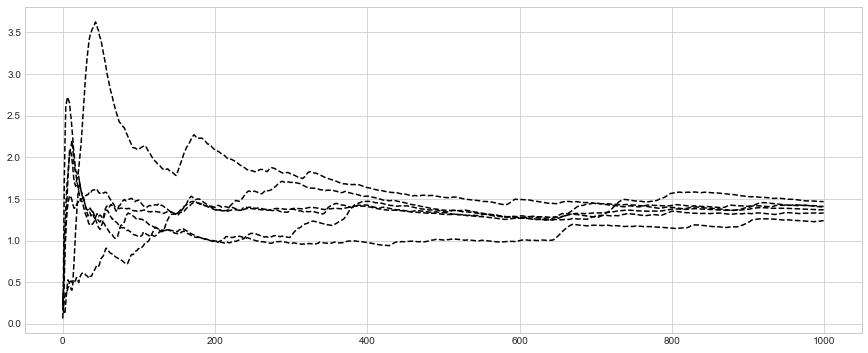

In [119]:
lamda = 1.3
mu = 2
n = 1000
R = 5
Y = np.zeros(shape = (R, n))

for i in range(R):
    seed()
    Y[i] = out_var_cum_mm1(lamda, mu, n)

Z = []
for i in range(n):
    Z.append(np.sum(Y[:, i])/ R)

plt.plot(Y[0],'k--', label="Y[0]")
plt.plot(Y[1],'k--', label="Y[1]")
plt.plot(Y[2],'k--', label="Y[2]")
plt.plot(Y[3],'k--', label="Y[3]")
plt.plot(Y[4],'k--', label="Y[4]")
plt.plot(Z,'k--', label="Z")

In [120]:
import bisect
import random

#Parameters
lamda = 0.5
mu = 0.7
n = 100 # number of packets to be simulated

#Initialization
clock = 0.0
evList = []
count = 0 # Number of packets simulated so far

#Insert an event to the event list
def insert(ev):
    bisect.insort_right(evList, ev)

#Event Generator for the arrival event
def Gen_Arr_Ev(clock):
    global count
    count += 1

    if count <= n:
        ev = (clock + expovariate(lamda), Handle_Arr_Ev)
        insert(ev)

#Event Generator for the departure event
def Gen_Dep_Ev(clock):
    ev = (clock + expovariate(mu), Handle_Dep_Ev)
    insert(ev)

#Event Handler for the arrival event
def Handle_Arr_Ev(clock):
    global N
    N = N + 1
    Gen_Arr_Ev(clock)
    if N == 1:
        Gen_Dep_Ev(clock)

#Event Handler for the departure Event
def Handle_Dep_Ev(clock):
    global N
    N = N - 1
    if N > 0:
        Gen_Dep_Ev(clock)

#Initialize state variables and generate initial events
N = 0 
Gen_Arr_Ev(0.0)

while evList:
    ev = evList.pop(0)
    clock = ev[0]
    ev[1](clock)


In [121]:
Pa = 0.2 # arrival
Pd = 0.6 # Departure

clock = 0
Delta_T = 1

Total_Number_Of_Slots = 10000
Q=0

for n in range(1, Total_Number_Of_Slots):
    A = 0 
    D = 0
    clock = clock + Delta_T
    if random.random() <= Pa:
        A = 1
    if random.random() <= Pd and Q > 0:
        D = 1
    Q = Q + (A-D)

In [122]:
import queue
import math

lamda = 0.2
mu = 0.3
n = 1000

evID = 0
count = 0
Q=0
S = False 
arrs = []
deps = []

evList = None

def get_next_arrival_event(clock):
    global evID
    iat = expovariate(lamda)
    ev = (clock + iat, evID, arrival_event_handler)
    evID += 1
    return ev

def get_next_departure_event(clock):
    global evID
    st = expovariate(mu)
    ev = (clock + st, evID, departure_event_handler)
    evID += 1
    return ev

def arrival_event_handler(clock):
    global n, count, Q, S, arrs
    Q += 1
    arrs.append(clock)
    if S == False:
        S = True
        schedule_event(get_next_departure_event(clock))
    count += 1
    if count < n:
        schedule_event(get_next_arrival_event(clock))
    
def departure_event_handler(clock):
    global Q, S, deps
    Q -= 1
    deps.append(clock)
    if Q == 0:
        S = False
    else:
        S = True
        schedule_event(get_next_departure_event(clock))

def schedule_event(ev):
    global evList
    evList.put(ev)
    
def sim():
    global Q, S, arrs, deps, count, evList
    clock = 0
    evList = queue.PriorityQueue()
    Q = 0
    S = False
    arrs = []
    deps = []
    count = 0
    ev = get_next_arrival_event(clock)
    schedule_event(ev)
    
    while not evList.empty():
        ev = evList.get()
        clock = ev[0]
        ev[2](clock)

def main():
    global arrs, deps
    m = 50
    Samples = []
    for i in range(m):
        d = []
        random.seed()
        sim()
        d = list(map(lambda x, y: x-y, deps, arrs))
        Samples.append(np.mean(d))
    
    sample_mean = np.mean(Samples)
    sample_std_dev = np.std(Samples)
    t = 1.96
    ci1 = sample_mean - t * (sample_std_dev/np.sqrt(m))
    ci2 = sample_mean + t * (sample_std_dev/np.sqrt(m))
    
    print(round(sample_mean, 2))
    print(round(ci1,2), round(ci2, 2))
    print(round(1/(mu - lamda), 2))
    
main()
    

10.07
9.94 10.19
10.0


In [123]:
import math
def f(x):
    return 0.2 * math.exp(-(x - 0.2)**2.0) + 0.8 * math.exp(-(x - 2.0)**2 / .2)

def g(x):
    return 1

stop = False
while not stop:
    x = random.uniform(0, 4) # generate x
    u = random.random() # y = u * g(x)
    if u <= f(x)/g(x):
        print(x, f(x), f(x)/g(x))
        stop = True

1.9583702606374835 0.8021812323758104 0.8021812323758104


In [124]:
rnd.seed(10)

0.0 (0.0, 'receiver_start', <function receiver_start_event_handler at 0x7fcddf641158>)
0.0 (0.0, 'sender_start', <function sender_start_event_handler at 0x7fcddf641ea0>)
0.0 (0.0, 'transmission', <function frame_trans_event_handler at 0x7fcddf641bf8>)
0.7838402659490534 0.1 False
1.0 (1.0, 'reception', <function frame_reception_event_handler at 0x7fcddf641b70>)
1.0 (1.0, 'ack', <function ack_reception_event_handler at 0x7fcddf001620>)
1.0 (1.0, 'transmission', <function frame_trans_event_handler at 0x7fcddf641bf8>)
0.9333043754504806 0.1 False
2.0 (2.0, 'reception', <function frame_reception_event_handler at 0x7fcddf641b70>)
2.0 (2.0, 'ack', <function ack_reception_event_handler at 0x7fcddf001620>)
2.0 (2.0, 'transmission', <function frame_trans_event_handler at 0x7fcddf641bf8>)
0.9510232482013938 0.1 False
3.0 (3.0, 'reception', <function frame_reception_event_handler at 0x7fcddf641b70>)
3.0 (3.0, 'ack', <function ack_reception_event_handler at 0x7fcddf001620>)
3.0 (3.0, 'transmission

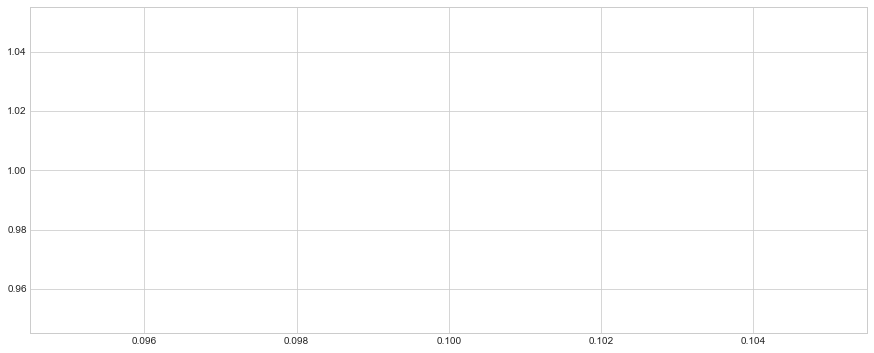

In [85]:

# Define a dictionary to hold the simulation parameters

#-------------- Global Variables --------------

Frames_Received = 0
Count_Frames = 0
clock = 0.0
timeout_cnt = 0 
#SEN_TIME = [0] * (50 + 1)
#REC_TIME = [0] * (50 + 1)
evList = queue.PriorityQueue()


#-------------- Event Generators --------------
# REG for the sender start event
def sender_start_event (clock, param):
    ev = (clock, "sender_start", sender_start_event_handler)
    return ev

# REG for the receiver start event
def receiver_start_event (clock, param):
    ev = (clock, "receiver_start", receiver_start_event_handler)
    return ev

# REG for the frame transmission event
def frame_trans_event (clock, param):
    global Count_Frames
    if(Count_Frames < param['Num_Frames']):
        Count_Frames += 1
        #SEN_TIME[Count_Frames] = clock
        ev = (clock, "transmission", frame_trans_event_handler)
        return ev


# REG for the timeout event
def timeout_event (clock, param):
    t = param['Timeout_Duration']
    ev = (clock+t, "timeout", timeout_event_handler)
    return ev

# REG for the frame reception event
def frame_reception_event (clock, param):
    t = param['Frame_Trans_Time']
    ev = (clock+t, "reception", frame_reception_event_handler)
    return ev

# REG for the acknowledgement event
def ack_event (clock, param):
    global Count_Frames
    #REC_TIME[Count_Frames] = clock
    ev = (clock, "ack", ack_reception_event_handler)
    return ev


#-------------- Event Handlers --------------
# Event handler for the sender start event
def sender_start_event_handler (clock, param):
    global Count_Frames
    Count_Frames = 0
    # Schedule the first frame transmission event
    schedule_event( frame_trans_event (clock, param) )

# Event handler for the receiver start event
def receiver_start_event_handler (clock, param):
    global Frames_Received
    Frames_Received = 0

# Event handler for the frame transmission event
def frame_trans_event_handler (clock, param):
    # Generate a frame reception event if frame is going 
    # to be succefully received
    global Count_Frames
    global timeout_cnt
    rnd_number = rnd.random()
    print(rnd_number, param['P'], rnd_number <= param['P'])
    if rnd_number <= param['P']:
        timeout_cnt += 1
        # Frame is damaged. Generate a timeout event
        schedule_event( timeout_event(clock, param) )
    else:
        # Frame is successfully delivered
        schedule_event( frame_reception_event(clock, param) )

# Event handler for the frame reception event
def frame_reception_event_handler (clock, param):
    global Frames_Received
    global Count_Frames
    Frames_Received += 1
    schedule_event( ack_event(clock, param) )

# Event handler for the ack event
def ack_reception_event_handler (clock, param):
    schedule_event( frame_trans_event (clock, param) )

# Event handler for the timeout event
def timeout_event_handler (clock, param):
    global Count_Frames
    # Re-transmit the frame again
    Count_Frames = Count_Frames - 1;
    schedule_event( frame_trans_event (clock, param) )

# Insert an event into the event list		
def schedule_event(ev):
    global evList
    if ev != None:
        evList.put(ev)

#----- Start Simulation -----
import numpy as np

throughput = {}
for p in np.arange(0.1,1 , 0.1):
    param = {'Timeout_Duration': 1, 
             'P' : round(p,1), # Frame Error Rate (FER)
             'Frame_Trans_Time': 1, # Frame transmission time
             'Num_Frames': 10
            }
    schedule_event( sender_start_event (clock, param) )
    schedule_event( receiver_start_event (clock, param) )

    while not evList.empty():
        ev = evList.get()
        clock = ev[0]
        print(clock, ev)
        ev[2](clock, param)
    throughput[p] = param['Num_Frames']/clock
    print(p,round(p,1), param['Num_Frames'], clock, param['Num_Frames']/clock)
    if (p == 0.1):
        break

plt.plot(throughput.keys(), throughput.values())

In [128]:
from abc import ABC, abstractmethod
import queue


# States
class State(ABC):
    @abstractmethod
    def event(self, clock):
        pass

    @abstractmethod
    def event_handler(self, clock):
        pass


class PacketTransmit(State):
    def __init__(self, context):
        self.context = context
        self.timeout_cnt = 0

    def start_event(self, clock):
        ev = (clock, "sender_start", self.start_event_handler)
        return ev

    def start_event_handler(self, clock):
        self.context.count_frames = 0
        self.context.schedule_event(self.event(clock))

    def event(self, clock):
        if self.context.count_frames < self.context.param['num_packets']:
            self.context.count_frames += 1
            ev = (clock, "Transmission", self.event_handler)
            return ev

    def event_handler(self, clock):
        rnd_number = rnd.random()
        #rnd_number = rnd.expovariate(2)
        #print(rnd_number, self.context.param['P'], rnd_number <= self.context.param['P'])
        if rnd_number <= self.context.param['P']:
            self.timeout_cnt += 1
            self.context.schedule_event(self.context.timeout.event(clock))
        else:
            self.context.schedule_event(self.context.packet_receive.event(clock))


class PacketReceive(State):

    def __init__(self, context):
        self.context = context

    def start_event(self, clock):
        ev = (clock, "receiver_start", self.start_event_handler)
        return ev

    def start_event_handler(self, clock):
        self.context.frames_received = 0

    def event(self, clock):
        t = self.context.param['packet_trans_time']
        ev = (clock + t, "reception", self.event_handler)
        return ev

    def event_handler(self, clock):
        self.context.frames_received += 1
        self.context.schedule_event(self.context.ack.event(clock))


class Ack(State):

    def __init__(self, context):
        self.context = context

    def event(self, clock):
        t = self.context.param['packet_trans_time']
        ev = (clock+t, "ack", self.event_handler)
        return ev

    def event_handler(self, clock):
        self.context.schedule_event(self.context.packet_transmit.event(clock))


class TimeOut(State):

    def __init__(self, context):
        self.context = context

    def event(self, clock):
        t = self.context.param['timeout_duration']
        ev = (clock + t, "timeout", self.event_handler)
        return ev

    def event_handler(self, clock):
        self.context.count_frames = self.context.count_frames - 1
        self.context.schedule_event(self.context.packet_transmit.event(clock))


class Context:
    def __init__(self, param):
        self.packet_transmit = PacketTransmit(self)
        self.packet_receive = PacketReceive(self)
        self.ack = Ack(self)
        self.timeout = TimeOut(self)
        self.param = param
        self.frames_received = 0
        self.count_frames = 0.0
        self.evList = queue.PriorityQueue()
        self.clock = 0.0

    def schedule_event(self, ev):
        if ev != None:
            self.evList.put(ev)


new_thrghpt = {}
for p in np.arange(0, 1, 0.1):
    param = {'timeout_duration': 1,
             'P': round(p, 1),  # Frame Error Rate (FER)
             'packet_trans_time': 1,  # Frame transmission time
             'num_packets': 100000
             }
    # 1. Initialize sender and receiver
    context = Context(param)
    context.schedule_event(context.packet_transmit.start_event(context.clock))
    context.schedule_event(context.packet_receive.start_event(context.clock))

    # 2. Run the simulation loop
    while not context.evList.empty():
        ev = context.evList.get()
        context.clock = ev[0]
        ev[2](context.clock)
    new_thrghpt[p] = param['num_packets']/context.clock
    #new_thrghpt[i] = param['num_packets']/context.clock
    print(p, round(p, 1), param['num_packets'], context.clock, param['num_packets']/context.clock)

0.0 0.0 100000 200000.0 0.5
0.1 0.1 100000 211148.0 0.47360145490366945
0.2 0.2 100000 224868.0 0.4447053382428803
0.30000000000000004 0.3 100000 242940.0 0.41162426936692187
0.4 0.4 100000 266955.0 0.3745949691895638
0.5 0.5 100000 300301.0 0.3329992241118078
0.6000000000000001 0.6 100000 350832.0 0.28503671272859943
0.7000000000000001 0.7 100000 433433.0 0.23071616605103903
0.8 0.8 100000 599730.0 0.166741700431861
0.9 0.9 100000 1102964.0 0.09066479050993505


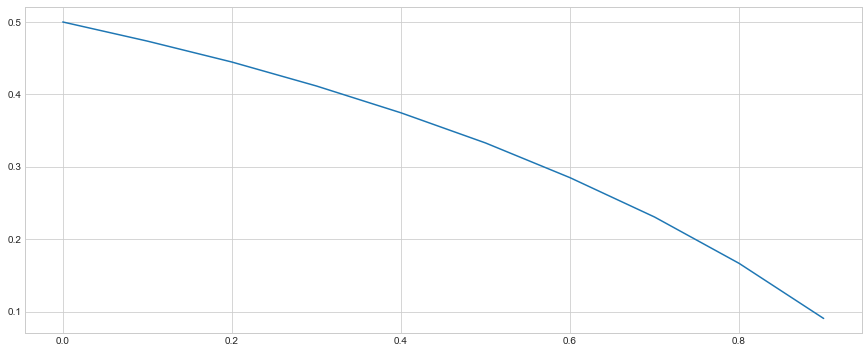

In [129]:
plt.plot(new_thrghpt.keys(), new_thrghpt.values())

In [130]:
new_thrghpt

{0.0: 0.5,
 0.1: 0.47360145490366945,
 0.2: 0.4447053382428803,
 0.30000000000000004: 0.41162426936692187,
 0.4: 0.3745949691895638,
 0.5: 0.3329992241118078,
 0.6000000000000001: 0.28503671272859943,
 0.7000000000000001: 0.23071616605103903,
 0.8: 0.166741700431861,
 0.9: 0.09066479050993505}